In [53]:
# %%time
# Import the libraries
import pandas as pd
import numpy as np
import keras
from keras import backend as K
from keras.layers.core import Dense, Dropout
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import shutil

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras import layers
from keras import models
from os import rename, listdir
import os, zipfile
import random
from random import random
from random import randrange
from random import choice
from random import uniform
from matplotlib import pyplot
import skimage.io as io

from keras.metrics import categorical_accuracy
from keras.optimizers import Adam

import tensorflow as tf 

In [55]:
# from fastai import *
# from fastai.vision import *
# from fastai.callbacks.hooks import *

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import auc,roc_curve

import os
import zipfile

from sklearn.model_selection import train_test_split

from tensorflow.python.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D, BatchNormalization
from tensorflow.python.keras.applications.resnet50 import preprocess_input
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.preprocessing.image import load_img, img_to_array

import shutil

from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

# from . import backend as K

In [2]:
#Seting the directory for the images 
dir_zip = r'D:\Python\Jupyter\DeepLearning\ProjectResnet\zipFiles'
dir_database = r'D:\Python\Jupyter\DeepLearning\ProjectResnet\DataBase'
dir_MetaData = r'D:\Python\Jupyter\DeepLearning\ProjectResnet\metaData_dataBase'
dir_project = r'D:\Python\Jupyter\DeepLearning\ProjectResnet'

In [3]:
# Paths and roots to the important files
# path='../input/'
csv_file=dir_MetaData+'\HAM10000_metadata.csv'

In [4]:
#%%time
extension = ".zip"

os.chdir(dir_zip) # change directory from working dir to dir with files

if len(os.listdir(os.path.abspath(dir_database)))==0 or len(os.listdir(os.path.abspath(dir_database)))==1:
    # Loop to extract all Images from a the zip file on directory
    for item in os.listdir(dir_zip): # loop through items in dir
        if item.endswith(extension): # check for ".zip" extension
            file_name = os.path.abspath(item) # get full path of files
            print("Processing %s" % file_name)
            zip_ref = zipfile.ZipFile(file_name) # create zipfile object
            os.chdir(dir_zip) # change directory from working dir to dir with files
            zip_ref.extractall(dir_database) # extract file to dir
            zip_ref.close() # close file
            #os.remove(file_name) # delete zipped file
else:
    print(len(os.listdir(os.path.abspath(dir_database))))

10019


In [5]:
# print(os.listdir(dir_database))

In [6]:
metadata = pd.read_csv(dir_MetaData+'/HAM10000_metadata.csv', header=0, index_col=1)

In [7]:
metadata.head()

,lesion_id,dx,dx_type,age,sex,localization
image_id,,,,,,
ISIC_0027419,HAM_0000118,bkl,histo,80.0,male,scalp
ISIC_0025030,HAM_0000118,bkl,histo,80.0,male,scalp
ISIC_0026769,HAM_0002730,bkl,histo,80.0,male,scalp
ISIC_0025661,HAM_0002730,bkl,histo,80.0,male,scalp
ISIC_0031633,HAM_0001466,bkl,histo,75.0,male,ear


In [8]:
df=pd.read_csv(csv_file).set_index('image_id')
df.head()

,lesion_id,dx,dx_type,age,sex,localization
image_id,,,,,,
ISIC_0027419,HAM_0000118,bkl,histo,80.0,male,scalp
ISIC_0025030,HAM_0000118,bkl,histo,80.0,male,scalp
ISIC_0026769,HAM_0002730,bkl,histo,80.0,male,scalp
ISIC_0025661,HAM_0002730,bkl,histo,80.0,male,scalp
ISIC_0031633,HAM_0001466,bkl,histo,75.0,male,ear


In [9]:
# Categories of the diferent diseases
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

In [10]:
metadata.dx=metadata.dx.astype('category',copy=True)
metadata['labels']=metadata.dx.cat.codes # Convert the labels to numbers
metadata['lesion']= metadata.dx.map(lesion_type_dict)
metadata.head()

,lesion_id,dx,dx_type,age,sex,localization,labels,lesion
image_id,,,,,,,,
ISIC_0027419,HAM_0000118,bkl,histo,80.0,male,scalp,2,Benign keratosis
ISIC_0025030,HAM_0000118,bkl,histo,80.0,male,scalp,2,Benign keratosis
ISIC_0026769,HAM_0002730,bkl,histo,80.0,male,scalp,2,Benign keratosis
ISIC_0025661,HAM_0002730,bkl,histo,80.0,male,scalp,2,Benign keratosis
ISIC_0031633,HAM_0001466,bkl,histo,75.0,male,ear,2,Benign keratosis


In [11]:
print(metadata.lesion.value_counts())

Melanocytic nevi        6705
Melanoma                1113
Benign keratosis        1099
Basal cell carcinoma     514
Actinic keratoses        327
Vascular lesions         142
Dermatofibroma           115
Name: lesion, dtype: int64


In [12]:
metadata.loc['ISIC_0027419','lesion']

'Benign keratosis '

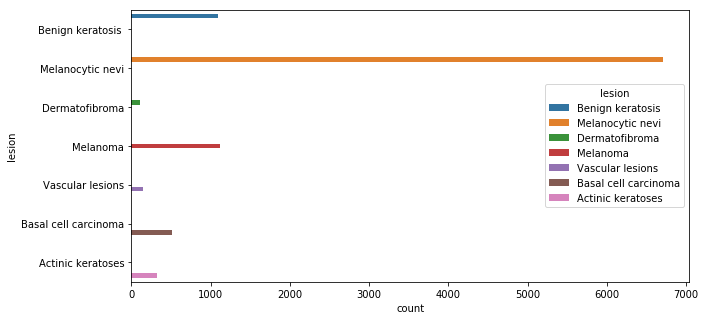

In [13]:
fig, ax1 = plt.subplots(1, 1, figsize = (10, 5))
sns.countplot(y='lesion',data=metadata, hue="lesion",ax=ax1)

In [14]:
metadata.head()

,lesion_id,dx,dx_type,age,sex,localization,labels,lesion
image_id,,,,,,,,
ISIC_0027419,HAM_0000118,bkl,histo,80.0,male,scalp,2,Benign keratosis
ISIC_0025030,HAM_0000118,bkl,histo,80.0,male,scalp,2,Benign keratosis
ISIC_0026769,HAM_0002730,bkl,histo,80.0,male,scalp,2,Benign keratosis
ISIC_0025661,HAM_0002730,bkl,histo,80.0,male,scalp,2,Benign keratosis
ISIC_0031633,HAM_0001466,bkl,histo,75.0,male,ear,2,Benign keratosis


In [15]:
# Create a list of file names
#-------------------------------------------------#
filenames = [os.path.splitext(filename)[0] for filename in os.listdir(dir_database) if filename.endswith(".jpg")]
prov_filenames = []
for name in filenames:
    prov_filenames.append(name[-12:])
filenames = prov_filenames
filenames = pd.DataFrame(np.array(filenames).reshape(10015,1),columns=['filenames'])
# filenames = pd.DataFrame(np.array(filenames).reshape(2000,1),columns=['filenames'])

In [16]:
# # Organize dataset according to photos actual order
# ----------------------------------------------------
# # Merging the file names and the metadata, thus organizing the data.

organized_metadata = pd.merge(left=filenames, right=metadata, left_on='filenames',right_on='image_id')
# # print(organized_metadata)

In [17]:
organized_metadata['dx'] = organized_metadata['dx'].astype(np.str)
organized_metadata['filenames'] = organized_metadata['filenames'].astype(np.str)

In [18]:
# It removes all metadata but dx (lesion type)

# It removes all metadata but dx (lesion type)
organized_metadata['filenames_dx'] = organized_metadata['dx'] + '.' + organized_metadata['filenames']

In [19]:
organized_metadata.head()

,filenames,lesion_id,dx,dx_type,age,sex,localization,labels,lesion,filenames_dx
0,ISIC_0024329,HAM_0002954,akiec,histo,75.0,female,lower extremity,0,Actinic keratoses,akiec.ISIC_0024329
1,ISIC_0024372,HAM_0005389,akiec,histo,70.0,male,lower extremity,0,Actinic keratoses,akiec.ISIC_0024372
2,ISIC_0024418,HAM_0003380,akiec,histo,75.0,female,lower extremity,0,Actinic keratoses,akiec.ISIC_0024418
3,ISIC_0024450,HAM_0005505,akiec,histo,50.0,male,upper extremity,0,Actinic keratoses,akiec.ISIC_0024450
4,ISIC_0024463,HAM_0004568,akiec,histo,50.0,male,upper extremity,0,Actinic keratoses,akiec.ISIC_0024463


In [20]:
# #%%time
# # Labels
# Verify whether it is useful or not

labels = np.array(organized_metadata['dx'].tolist())
filenames = np.array(organized_metadata['filenames'].tolist())
print(len(labels))

10015


In [21]:
# Creating Train / Val / Test folders (One time use)
lesionstype = ['nv','mel',"vasc",'akiec','bcc','bkl','df']

In [22]:
os.chdir(dir_database)

In [23]:
# %%time
def list_files(path):
    # returns a list of names (with extension, without full path) of all files 
    # in folder path
    files = []
    for name in os.listdir(path):
        if os.path.isfile(os.path.join(path, name)):
            files.append(name)
    return files 

images = list_files('.')

for img, extra in zip(images, labels) :
    filename, extension = os.path.splitext(img)
    if filename.startswith("ISIC_"):
        os.rename(img, ''.join([extra, '-', filename, extension]))
#     print(img)

In [24]:
# Listintg the file names again (After the modify them):

def get_file_list_from_dir(dir_database):
    all_files = os.listdir(os.path.abspath(dir_database))
    data_files = list(filter(lambda file: file.endswith(".jpg"), all_files))
    return data_files

filenames = get_file_list_from_dir(dir_database)

In [25]:
# Shuffle the data order:
import random
random.shuffle(filenames)

In [26]:
data_train, data_validate, label_train, label_validate = train_test_split(np.array(filenames), labels, 
                                                                          test_size=0.4, 
                                                                          random_state=1, 
                                                                          stratify=labels)

data_validate, data_test, label_validate, label_test = train_test_split(data_validate, label_validate, 
                                                                  test_size=0.5, 
                                                                  random_state=1, 
                                                                  stratify=label_validate)

train_filenames = [name for name in data_train.tolist()]
val_filenames = [name for name in data_validate.tolist()]
test_filenames = [name for name in data_test.tolist()]

In [27]:
print('Total images: ', len(filenames))
print('Training: ', len(train_filenames))
print('Validation: ', len(val_filenames))
print('Testing: ', len(test_filenames))

Total images:  10015
Training:  6009
Validation:  2003
Testing:  2003


In [28]:
print('Total labels: ', len(labels))
print('Training_labels: ', len(label_train))
print('Validation_labels: ', len(label_validate))
print('Testing_labels: ', len(label_test))

Total labels:  10015
Training_labels:  6009
Validation_labels:  2003
Testing_labels:  2003


In [29]:
unique_elements, counts_elements = np.unique(label_train, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[['akiec' 'bcc' 'bkl' 'df' 'mel' 'nv' 'vasc']
 ['196' '309' '659' '69' '668' '4023' '85']]


In [30]:
os.chdir(dir_database)

In [31]:
# %%time
# # Copy-pasting images: for train, validation and test

envs = dict()
envs['train'] = train_filenames
envs['test'] = test_filenames
envs['val'] = val_filenames

for env in envs:
    if not os.path.isdir(dir_database +'/'+ env): os.makedirs(dir_database +'/'+ env)
    for i in lesionstype:   
        print('Analysing '+ env + ' ' + i + ' Lesions')
        if not os.path.isdir(dir_database + '/'+env+'/' + i): os.makedirs(dir_database + '/'+env+'/' + i)
        if len(os.listdir(os.path.abspath(dir_database + '/'+env+'/' + i)))<=1:
            for name in envs[env]:
                if name.startswith(i):
                    shutil.copy(name, dir_database+"/"+env+"/"+i+"/")
        print(env+' '+i+' lesions images: '+ str(len(os.listdir(os.path.abspath(dir_database + '/'+env+'/' + i)))))
    print()
    print('---- / / ----')

Analysing train nv Lesions
train nv lesions images: 4013
Analysing train mel Lesions
train mel lesions images: 661
Analysing train vasc Lesions
train vasc lesions images: 95
Analysing train akiec Lesions
train akiec lesions images: 199
Analysing train bcc Lesions
train bcc lesions images: 315
Analysing train bkl Lesions
train bkl lesions images: 652
Analysing train df Lesions
train df lesions images: 74

---- / / ----
Analysing test nv Lesions
test nv lesions images: 1339
Analysing test mel Lesions
test mel lesions images: 241
Analysing test vasc Lesions
test vasc lesions images: 25
Analysing test akiec Lesions
test akiec lesions images: 58
Analysing test bcc Lesions
test bcc lesions images: 99
Analysing test bkl Lesions
test bkl lesions images: 219
Analysing test df Lesions
test df lesions images: 22

---- / / ----
Analysing val nv Lesions
val nv lesions images: 1353
Analysing val mel Lesions
val mel lesions images: 211
Analysing val vasc Lesions
val vasc lesions images: 22
Analysing 

In [32]:
train_path = dir_database+"/train"
val_path = dir_database+"/val"
test_path = dir_database+"/test"

In [33]:
# Declare a few useful values
num_train_samples = sum([len(files) for r, d, files in os.walk(train_path)]) #len(train_filenames) 
num_val_samples = sum([len(files) for r, d, files in os.walk(val_path)]) #len(val_filenames)
num_test_samples = sum([len(files) for r, d, files in os.walk(test_path)]) #len(test_filenames)
train_batch_size = 10
val_batch_size = 10
test_batch_size = 1

image_width = 200
image_height = 150

In [34]:
datagen = ImageDataGenerator(rescale = 1./255)

In [35]:
# Declare how many steps are needed in an iteration
train_steps = np.ceil(num_train_samples / train_batch_size)
val_steps = np.ceil(num_val_samples / val_batch_size)
test_steps = np.ceil(num_test_samples / val_batch_size)

### Set Up the generator batches

#### Train Batches

In [36]:
# Set up generators
print('Train Batches: ')
train_batches = datagen.flow_from_directory(
    train_path,
    target_size=(image_height, image_width),
    batch_size=train_batch_size,
    class_mode = 'categorical',
    classes = lesionstype)

Train Batches: 
Found 6009 images belonging to 7 classes.


#### Validation Batches

In [37]:
val_batches = datagen.flow_from_directory(
    val_path,
    target_size=(image_height, image_width),
    batch_size=val_batch_size,
    class_mode = 'categorical',
    classes = lesionstype)

Found 2003 images belonging to 7 classes.


#### Test Batches

In [38]:
test_batches = datagen.flow_from_directory(
    test_path,
    target_size=(image_height, image_width),
    batch_size=test_batch_size,
    class_mode = 'categorical',
    classes = lesionstype)

Found 2003 images belonging to 7 classes.


In [39]:
for data_batch, labels_batch in train_batches:
    print('Train: data batch shape:', data_batch.shape)
    print('Train: labels batch shape:', labels_batch.shape)
    print('--//--')
    break
    
for data_batch, labels_batch in val_batches:
    print('Validation: data batch shape:', data_batch.shape)
    print('Validation: labels batch shape:', labels_batch.shape)
    print('--//--')
    break
    
for data_batch, labels_batch in test_batches:
    print('Test: data batch shape:', data_batch.shape)
    print('Test: labels batch shape:', labels_batch.shape)
    print('--//--')
    break

Train: data batch shape: (10, 150, 200, 3)
Train: labels batch shape: (10, 7)
--//--
Validation: data batch shape: (10, 150, 200, 3)
Validation: labels batch shape: (10, 7)
--//--
Test: data batch shape: (1, 150, 200, 3)
Test: labels batch shape: (1, 7)
--//--


## Precision / Recall / F-Measure

In [50]:
def precision(y_true, y_pred):
    """Precision metric.
    Only computes a batch-wise average of precision.
    Computes the precision, a metric for multi-label classification of
    how many selected items are relevant.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def recall(y_true, y_pred):
    """Recall metric.
    Only computes a batch-wise average of recall.
    Computes the recall, a metric for multi-label classification of
    how many relevant items are selected.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def fbeta_score(y_true, y_pred, beta=1):
    """Computes the F score.
    The F score is the weighted harmonic mean of precision and recall.
    Here it is only computed as a batch-wise average, not globally.
    This is useful for multi-label classification, where input samples can be
    classified as sets of labels. By only using accuracy (precision) a model
    would achieve a perfect score by simply assigning every class to every
    input. In order to avoid this, a metric should penalize incorrect class
    assignments as well (recall). The F-beta score (ranged from 0.0 to 1.0)
    computes this, as a weighted mean of the proportion of correct class
    assignments vs. the proportion of incorrect class assignments.

    With beta = 1, this is equivalent to a F-measure. With beta < 1, assigning
    correct classes becomes more important, and with beta > 1 the metric is
    instead weighted towards penalizing incorrect class assignments.
    """

    if beta < 0:
        raise ValueError('The lowest choosable beta is zero (only precision).')

    # If there are no true positives, fix the F score at 0 like sklearn.
    if K.sum(K.round(K.clip(y_true, 0, 1))) == 0:
        return 0

    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    bb = beta ** 2
    fbeta_score = (1 + bb) * (p * r) / (bb * p + r + K.epsilon())
    return fbeta_score

def fmeasure(y_true, y_pred):
    """Computes the f-measure, the harmonic mean of precision and recall.
    Here it is only computed as a batch-wise average, not globally.
    """
    return fbeta_score(y_true, y_pred, beta=1)

## Checkpoint / Learning Rate / Callback 

In [42]:
from sklearn.utils.class_weight import compute_sample_weight

sample_weights = compute_sample_weight(class_weight='balanced', y=label_train)

# Declare the filepath for the saved model
os.chdir(dir_project)
filepath = "model.h5"

# Declare a checkpoint to save the best version of the model
# checkpoint = ModelCheckpoint(filepath, monitor='categorical_accuracy', verbose=1,
#                              save_best_only=True, mode='max')

# Reduce the learning rate as the learning stagnates
reduce_lr = ReduceLROnPlateau(monitor='categorical_accuracy', factor=0.5, patience=2,
                              verbose=1, mode='max', min_lr=1E-8)

callbacks_list = [checkpoint, reduce_lr]
# callbacks_list = [reduce_lr]

## Resnet

In [43]:
resnet_weights_path = dir_database+'/resnet50/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [44]:
model = Sequential()

model.add(ResNet50(include_top=False, pooling='avg', weights=resnet_weights_path))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(2048, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(7, activation='softmax'))

model.layers[0].trainable = False

Instructions for updating:
Colocations handled automatically by placer.


In [56]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[precision,recall,fmeasure,'categorical_accuracy'])

In [57]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
batch_normalization_v1 (Batc (None, 2048)              8192      
_________________________________________________________________
dense (Dense)                (None, 2048)              4196352   
_________________________________________________________________
batch_normalization_v1_1 (Ba (None, 2048)              8192      
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
batch_normalization_v1_2 (Ba (None, 1024)              4096      
__________

In [58]:
# count = sum([len(files) for r, d, files in os.walk("../input/flowers-recognition/flowers/flowers/")])

In [59]:
# torch.save(model.module.state_dict(), PATH)

In [60]:
history = model.fit_generator(
        train_batches,
        steps_per_epoch=train_steps + 1,
        epochs=10
        )

Epoch 1/10
601/601 [==============================] - 87s 145ms/step - loss: 0.4766 - precision: 0.8533 - recall: 0.8015 - fmeasure: 0.8252 - categorical_accuracy: 0.8254
Epoch 2/10
601/601 [==============================] - 86s 143ms/step - loss: 0.4378 - precision: 0.8689 - recall: 0.8203 - fmeasure: 0.8427 - categorical_accuracy: 0.8426
Epoch 3/10
601/601 [==============================] - 84s 140ms/step - loss: 0.3861 - precision: 0.8817 - recall: 0.8381 - fmeasure: 0.8583 - categorical_accuracy: 0.8595
Epoch 4/10
601/601 [==============================] - 86s 144ms/step - loss: 0.3938 - precision: 0.8793 - recall: 0.8425 - fmeasure: 0.8597 - categorical_accuracy: 0.8600
Epoch 5/10
601/601 [==============================] - 85s 141ms/step - loss: 0.3620 - precision: 0.8862 - recall: 0.8519 - fmeasure: 0.8678 - categorical_accuracy: 0.8689
Epoch 6/10
601/601 [==============================] - 83s 138ms/step - loss: 0.3642 - precision: 0.8814 - recall: 0.8496 - fmeasure: 0.8644 - cat

In [61]:
# Plotting the evolution of the loss, comparing training and validation
# To check if the number of epochs are not set properly

import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

KeyError: 'val_loss'

In [62]:
# Plotting the evolution of the metrics, comparing training and validation
# To check if the number of epochs are not set properly

plt.clf()      # clears the figure
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

KeyError: 'val_categorical_accuracy'

<Figure size 432x288 with 0 Axes>

In [63]:
## Evaluation of the model with metrics and confusion matrix ##

# Declare a function for plotting the confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

601/601 [==============================] - 78s 130ms/step
Confusion matrix, without normalization
[[2499  571  106  128  229  427   53]
 [ 446   69   17   28   35   61    5]
 [  61   14    1    5    4    8    2]
 [ 137   18    1    2    8   30    3]
 [ 203   40   13   10   12   28    9]
 [ 421   88   16   25   33   65    4]
 [  44   10    3    3    6    5    3]]


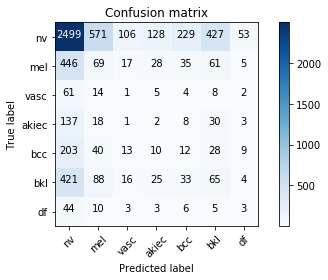

In [65]:
### Training evaluation : Confusion matrix and metrics  ###

# Create a confusion matrix of the training images
train_labels = train_batches.classes

# Make predictions
predictions = model.predict_generator(train_batches, steps=train_steps ,verbose=1)#, steps=train_steps
cm = confusion_matrix(train_labels, predictions.argmax(axis=1))
cm
plot_confusion_matrix(cm, lesionstype)

201/201 [==============================] - 27s 133ms/step
Confusion matrix, without normalization
[[866 222  37  35  61 120  12]
 [136  26  12   6  13  17   1]
 [ 15   2   0   1   1   2   1]
 [ 47  10   3   0   3   7   0]
 [ 68  17   1   2   5   7   0]
 [155  31   3   8  10  18   3]
 [ 15   2   0   1   1   0   0]]


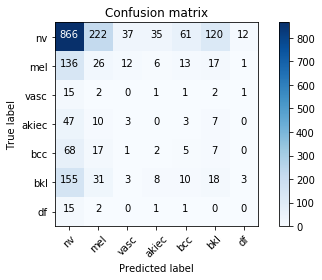

In [66]:
### Validation evaluation : Confusion matrix and metrics ###

# Create a confusion matrix of the training images
val_labels = val_batches.classes

# Make predictions
predictions = model.predict_generator(val_batches, steps=val_steps, verbose=1)
cm = confusion_matrix(val_labels, predictions.argmax(axis=1))
cm_plot_labels = lesionstype
plot_confusion_matrix(cm, cm_plot_labels)

2003/2003 [==============================] - 60s 30ms/step
Confusion matrix, without normalization
[[858 204  39  47  73 109   9]
 [159  39   4   7  11  18   3]
 [ 16   4   0   0   1   4   0]
 [ 38   9   1   0   4   6   0]
 [ 59  21   2   1   9   5   2]
 [138  43   4   8  14  12   0]
 [ 13   3   0   1   3   1   1]]


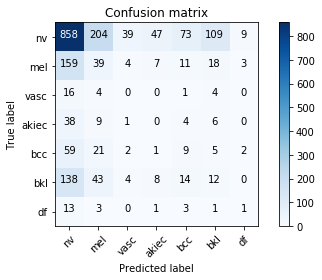

In [67]:
### Test evaluation : Confusion matrix and metrics ###

# Create a confusion matrix of the test images
test_labels = test_batches.classes

# Make predictions
predictions = model.predict_generator(test_batches, steps=num_test_samples, verbose=1)
cm = confusion_matrix(test_labels, predictions.argmax(axis=1))
cm_plot_labels = lesionstype
plot_confusion_matrix(cm, cm_plot_labels)